In [1]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

## 연습문제 1
> 백만개의 샘플을 가진 훈련세트에서 규제 없이 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?

+ 책 235p, 균형 이진 트리에서 깊이 $d$에서의 리프 노드 개수는 $2^d$ 입니다. 리프 노드가 훈련 데이터 수($m$)만큼 있다면 이 트리의 깊이는 $log_2{(m)}$이 됩니다.

In [ ]:
ex_target = 5
ex_dict = {}
for ex in range(ex_target, 0, -1):
  ex_dict[ex] = np.array([0 if i < 2**(ex-1) else 1 for i in range(2**ex)]*(2**(ex_target-ex)))

X = np.stack([v for _, v in ex_dict.items()], axis=1)
X.shape

(32, 5)

In [ ]:
y = [i for i in range(1, 2**ex_target+1)]

In [ ]:
print(X.shape, len(y))

(32, 5) 32


In [ ]:
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
tree_clf.get_depth()

5

In [ ]:
tree_clf.get_n_leaves()

32

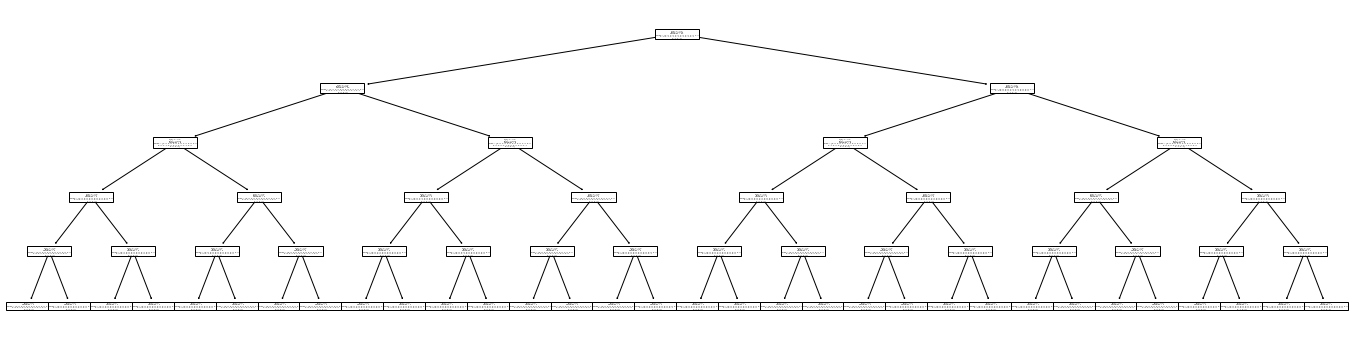

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))
plot_tree(tree_clf)
plt.show()

In [4]:
np.log2(10**6)

19.931568569324174

## 연습문제 2
> 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?

In [ ]:
X = np.array([0, 0, 1, 1, 1]).reshape(-1, 1)
y = [0, 1, 0, 0, 0]

In [ ]:
tree_clf2 = DecisionTreeClassifier()
tree_clf2.fit(X, y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

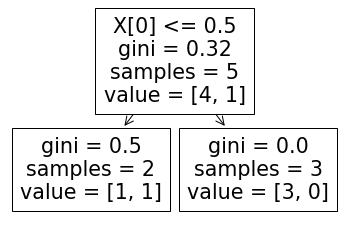

In [ ]:
plot_tree(tree_clf2)

## 연습문제 3
> 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?

In [ ]:
tree_clf3 = DecisionTreeClassifier()

In [ ]:
X1 = np.random.randn(100, 2)
X2 = np.random.randn(100, 2) + 1

In [ ]:
print(X1.shape, X2.shape)

(100, 2) (100, 2)


In [ ]:
print(np.mean(X1), np.mean(X2))

0.014535946516832305 0.9978380525463751


In [ ]:
y = [0 if i < 100 else 1 for i in range(200)]

In [ ]:
X = np.concatenate([X1, X2])
X.shape

(200, 2)

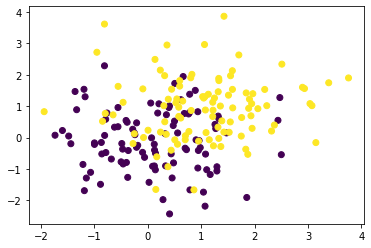

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
tree_clf3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[min(X[:,0])-0.2, max(X[:,0])+0.2, min(X[:,1])-0.2, max(X[:,1])+0.2]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

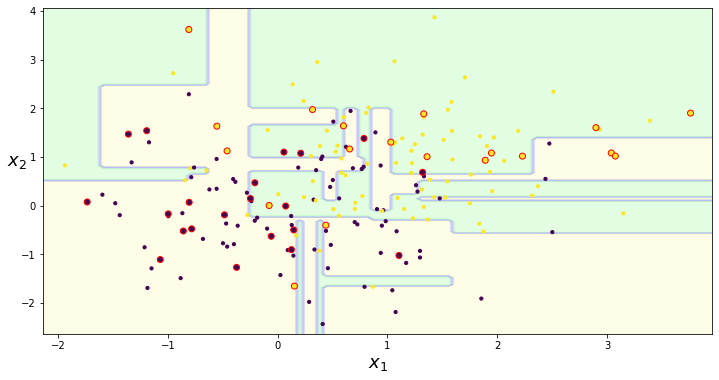

In [ ]:
plt.figure(figsize=(12, 6))
plot_decision_boundary(tree_clf3, X, y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red')
plt.show()

In [ ]:
tree_clf3.score(X_test, y_test)

0.625

In [ ]:
tree_clf3.score(X_train, y_train)

1.0

In [ ]:
print(tree_clf3.get_depth())

13


In [ ]:
tree_clf3_regularized = DecisionTreeClassifier(max_depth=8)
tree_clf3_regularized.fit(X_train, y_train)
print(tree_clf3_regularized.score(X_train, y_train))
print(tree_clf3_regularized.score(X_test, y_test))

0.91875
0.725


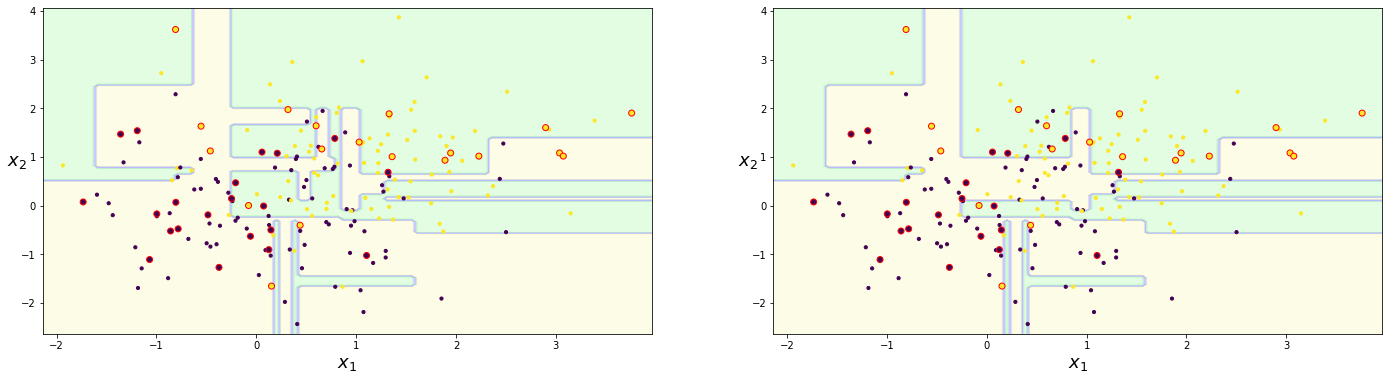

In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(tree_clf3, X, y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red')

plt.subplot(1, 2, 2)
plot_decision_boundary(tree_clf3_regularized, X, y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red')
plt.show()